In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


What did I decide to study? 

The question that I mianly tried to answer is: What customer characteristics  affect deposit rate and how different campaign strategies are effective to encourage deposit sign ups. 

To delve into this I analyzed age groups and job types, account balances, and marketing contact behaviors and how all this relates to deposit decisions. 


In [136]:
import pandas as pd 
import matplotlib.pyplot as plt


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df = pd.read_csv("/Users/kriticomputer/Downloads/bank.csv")



In [137]:
#Step 1: Clean the Data
df.isnull().sum()
df.dropna()
df.drop_duplicates


<bound method DataFrame.drop_duplicates of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  dura

In [138]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['balance'] < (Q1 - 1.5 * IQR)) | (df['balance'] > (Q3 + 1.5 * IQR))
outlier_r = df[outliers]
#print(outlier_r.sort_values(by = 'balance'))
max_balance = df['balance'].max()
max_balancename = df[df['balance'] == max_balance][['job', 'age','balance']]
max_balancename



,job,age,balance
3043,retired,84,81204
3380,retired,84,81204


At this point I was playing around with the data. I looked into the different outliers to see if that will help me out. From this I decided to print out the maximum values(above) and the minimum values(below).

In [139]:
min_balance = df['balance'].min()
min_balancename = df[df['balance'] == min_balance][['job','age','balance']]


min_balancename

,job,age,balance
6797,management,49,-6847


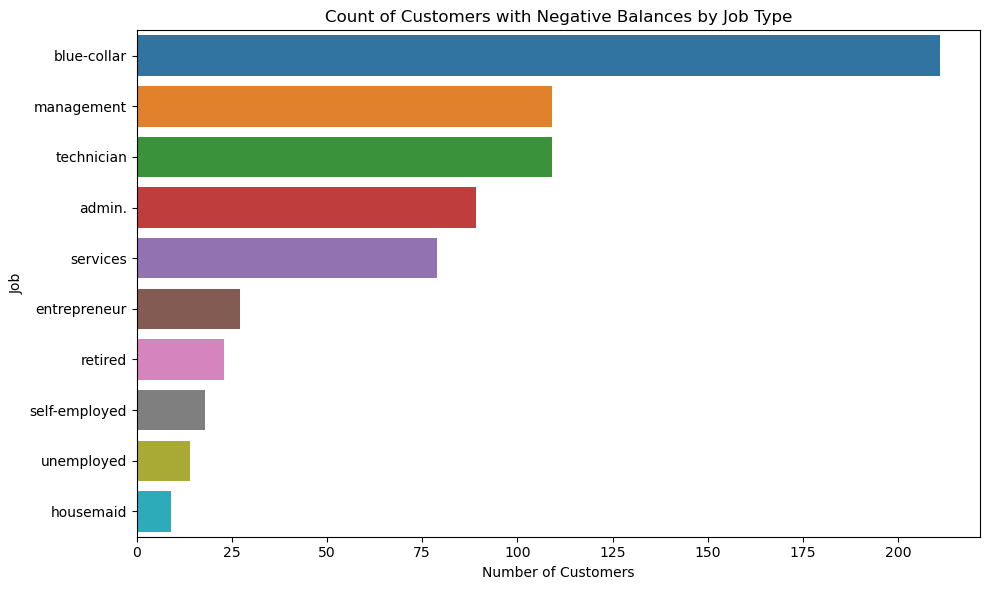

In [140]:
negbalance = df[df['balance'] < 0][['job', 'age', 'balance']]
#negbalance.head()

negative_balance_by_job = df[df['balance'] < 0].groupby('job').size().reset_index(name='count')


negative_balance_by_job = negative_balance_by_job.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=negative_balance_by_job, x='count', y='job')
plt.title("Count of Customers with Negative Balances by Job Type")
plt.xlabel("Number of Customers")
plt.ylabel("Job")
plt.tight_layout()
plt.show()


After that I wanted to look into the specifc jobs and ages that have a negative balance. I noticed there was a lot more diversity than I thought there would be so I made a bar chart to visualize it. 

Bar chart: 
The chart shows the financially at-risk  cusotmers of the bank based on their jobs. Most of these customers came form the blue-collar, services, and housemaid roles. 

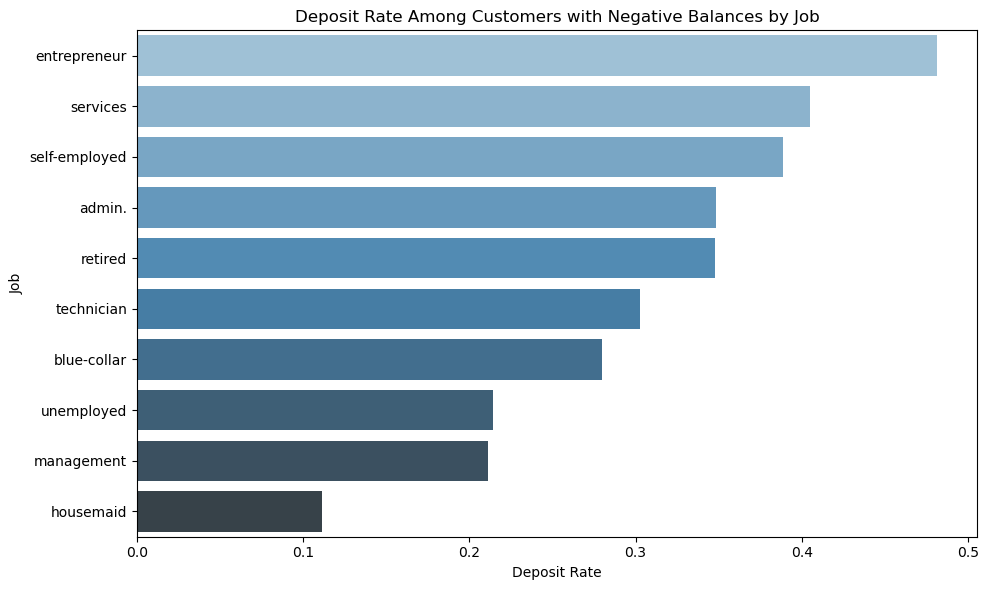

In [144]:
neg_balance_df = df[df['balance'] < 0]
df['deposit_binary'] = df['deposit'].map({'yes':1, 'no':0})
negdeposit_rate = neg_balance_df.groupby('job')['deposit_binary'].mean().reset_index()
negdeposit_rate = negdeposit_rate.sort_values(by='deposit_binary', ascending=False)

# Plot deposit rate for negative balance customers by job
plt.figure(figsize=(10, 6))
sns.barplot(data=negdeposit_rate, x='deposit_binary', y='job', palette='Blues_d')
plt.title("Deposit Rate Among Customers with Negative Balances by Job")
plt.xlabel("Deposit Rate")
plt.ylabel("Job")
plt.tight_layout()
plt.show()


To look into it further, I asked myself: Do these Customers still engage with deposit offer? In some cases, yes they do. Particulary if you look at retired and unemployed indivduals. When looking at the previous bar chart, they don't make up a large amount of the customer base. However, their deposit rates, despite being at-risk financially, are higher than a lot others. We can see from this financial hardship doesn't always correlate with disengagment for at-risk cutomers.

In [145]:
jobnegative = neg_balance_df.groupby('job')['balance'].mean().reset_index()
jobnegative = jobnegative.sort_values(by='balance', ascending=False)

jobnegative.head()


,job,balance
9,unemployed,-231.357143
1,blue-collar,-255.663507
0,admin.,-272.943820
7,services,-283.075949
5,retired,-296.217391


I made this list predominantly to see if entreprenerus had smaller negative balances. This was to see if there was any correlation between negative balances and deposit rates. It was shown that this was not the case, entrepreneurs did not have the smallest balance amongst those with negative balances. This further proves my statement from above. 

       Customer Count  Deposit Rate
18-25             450      0.711111
26-35            3921      0.476664
36-45            3158      0.411970
46-55            2149      0.415542
56-65            1086      0.539595
66+               398      0.804020


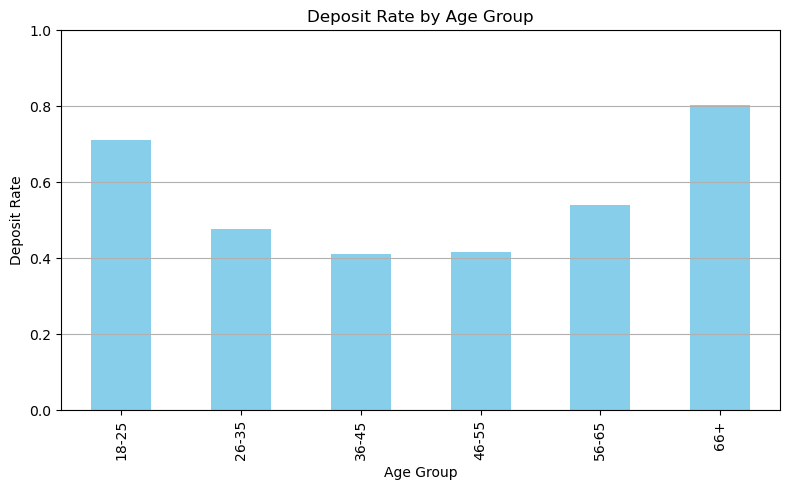

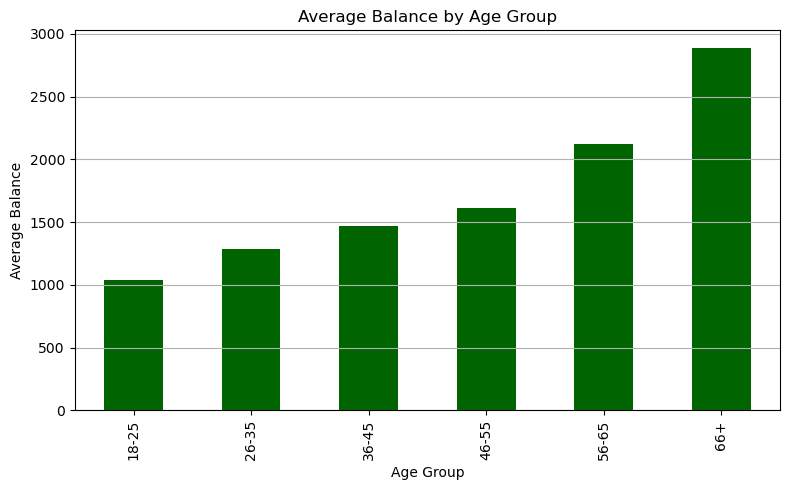

In [146]:

#Bin age into specifc ranges to understand a better pattern
bins = [17,25,35,45,55,65,100]
labels = ['18-25', '26-35', '36-45', '46-55','56-65','66+']
df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels)

df['deposit_binary'] = df['deposit'].map({'yes':1, 'no':0})
age_bin_counts = df['age_group'].value_counts().sort_index()
deposit_rate_by_age_bin = df.groupby('age_group')['deposit_binary'].mean()

age_bin_summary = pd.DataFrame({
    "Customer Count": age_bin_counts,
    "Deposit Rate": deposit_rate_by_age_bin})

print(age_bin_summary)

#Showing the Deposit Rate within each age group
plt.figure(figsize=(8,5))
df.groupby('age_group')['deposit_binary'].mean().plot(kind='bar', color='skyblue')
plt.title("Deposit Rate by Age Group")
plt.ylabel("Deposit Rate")
plt.xlabel('Age Group')
plt.ylim(0,1)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()


#Showing the average blance per age group 
plt.figure(figsize=(8,5))
df.groupby('age_group')['balance'].mean().plot(kind='bar', color='darkgreen')
plt.title("Average Balance by Age Group")
plt.ylabel("Average Balance")
plt.xlabel('Age Group')
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()


Next, I started lookinto age and job-based patterns: 

First I went in and binned the ages to look at them in more comprehensive groups. 
I decided to first look at what was suggested in the descirption of the project, wether there was a correlation between age and deposit rate. I found that the youngest group and the oldest group of people had the highest deposit rates. The younger groups are typically students and those older are typically retired. This means that money is not constant in their lives, especially for the younger ages bracket. This could suggest that those in the middle (36-55 yrs) are busier or more risk-aware. 26-35 is the largest group, but has only around a 45% deposit rate.
Then I compared the average balance per age group. The older a person was the higher their balance was, which made senese from common kowledge.This could suggest a potential connection bewteen savings behavior and deposit decisions. 

This might help to come up with specifc campaign strategies that will be less catered to different financial group and more specifc age or job related interests and savings styles. 


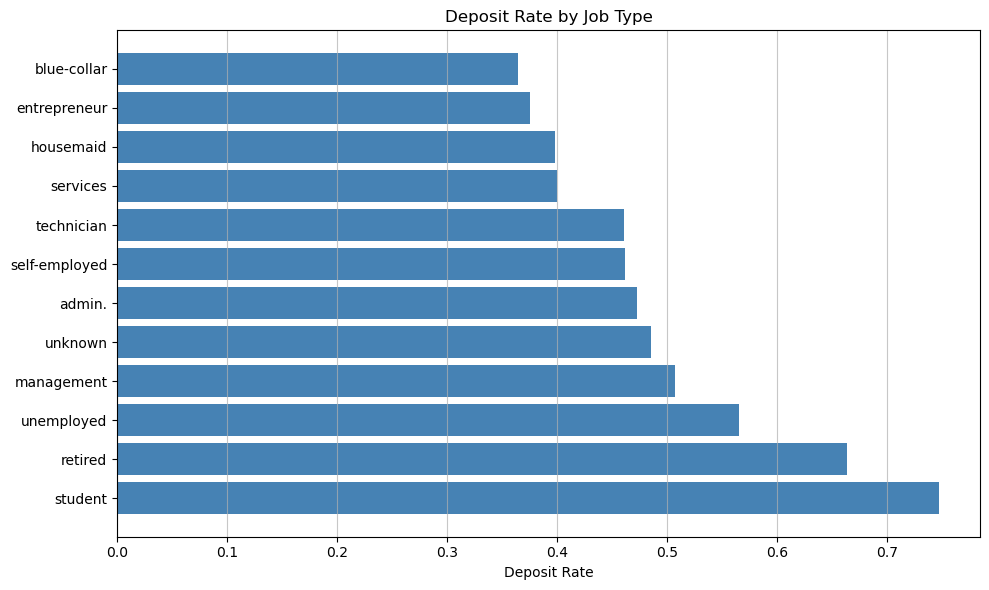

In [169]:
#Correlation between job and deposit rate

job_summary = df.groupby('job').agg(TCustomers=('deposit_binary','count'),Deposits_Made = ('deposit_binary','sum'), Deposit_Rate = ('deposit_binary','mean'))
jobs = job_summary.sort_values(by = 'Deposit_Rate', ascending = False)

plt.figure(figsize=(10,6))
plt.barh(jobs.index, jobs['Deposit_Rate'], color = 'steelblue')
plt.xlabel("Deposit Rate")
plt.title('Deposit Rate by Job Type')
plt.grid(axis = 'x', alpha = 0.7)
plt.tight_layout()
plt.show()





I wanted to figure out how jobs and deposit rates interacted. Students had the greatest deposit rate by far. 


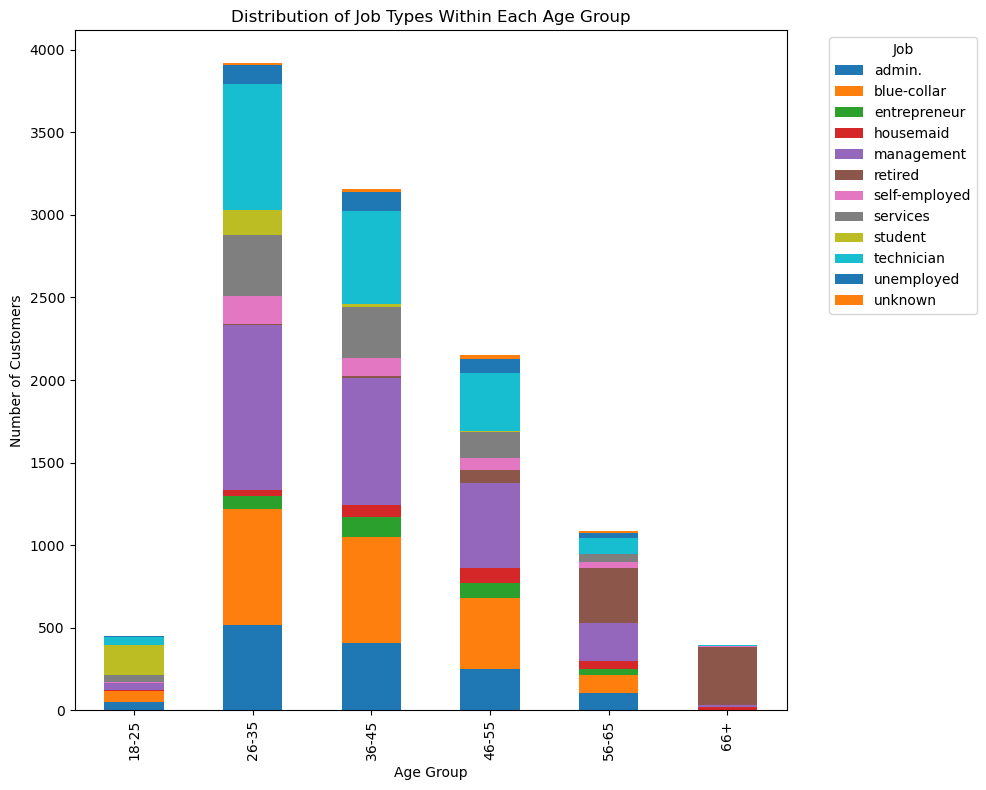

In [170]:
jobs_count = df.groupby(['age_group', 'job']).size().reset_index(name='count')
pivot_table = jobs_count.pivot(index = 'age_group', columns = 'job', values = 'count')

pivot_table.plot(kind = 'bar', stacked = True, figsize=(10,8))
plt.title("Distribution of Job Types Within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.legend(title='Job', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

After making the jobs vs. deposit rate I wanted to visualize the average job in each age group. I did not know if this was going to amount to anything, but I just wanted to check. I feel that this graph reinforces past beliefs, but it does not add anything new. Maybe in the future I can build on this more because I beleive to be helpful, but I am not sure what direction to take this on. 

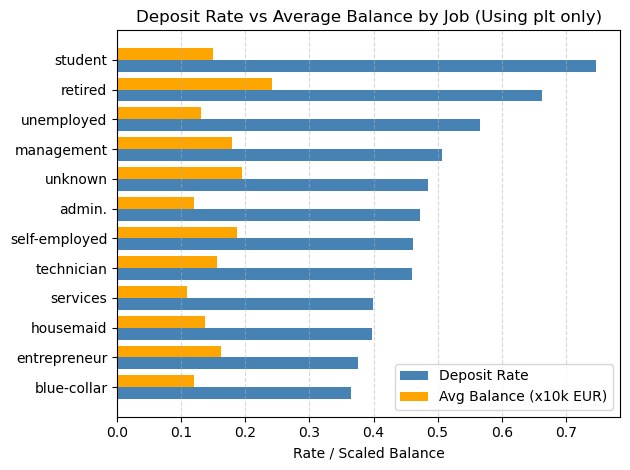

In [158]:
job_summary = df.groupby('job').agg(
    Total_Customers=('deposit_binary', 'count'),
    Deposits_Made=('deposit_binary', 'sum'),
    Deposit_Rate=('deposit_binary', 'mean'),
    Average_Balance=('balance', 'mean')
)

# Sort by deposit rate
job_summary_sorted = job_summary.sort_values(by='Deposit_Rate', ascending=False)


plt.barh([p + bar_width for p in positions],
         job_summary_sorted['Deposit_Rate'],
         height=bar_width,
         label='Deposit Rate',
         color='steelblue')

plt.barh(positions,
         job_summary_sorted['Average_Balance'] / 10000,
         height=bar_width,
         label='Avg Balance (x10k EUR)',
         color='orange')

plt.yticks([p + bar_width / 2 for p in positions], job_summary_sorted.index)
plt.xlabel('Rate / Scaled Balance')
plt.title('Deposit Rate vs Average Balance by Job (Using plt only)')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The next question I had was: Does having more money in the bank make someone more likely to accept a deposit offer?(I should mention here that I made the negative balances section after the age binning and everything that follows it.)

To test this I created a bar chart comparing the average balance with the deposit rate for each job type. Visually, rigt off the bat, It seems like higher balance job had a better deposit conversion. In order to validate this I had to perform specifc statistics. 

In [171]:
correlation = job_stats['avg_balance'].corr(job_stats['deposit_rate'])

anova_model = ols('balance ~ deposit', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

correlation
#anova_table


0.4321981475609152

In [173]:
nova_model = ols('balance ~ deposit', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
deposit,7.642258e+08,1.0,73.940086,9.126568e-18
Residual,1.153469e+11,11160.0,NaN,NaN


I calculated the correlation coeffecient between average balance and deposit rate by job. 
Result: 
r=.43 - This is a very moderate positve correlation. It does not necessarliy mean that there is a correlation. It suggests, though, that there could be one: If balance increases so will the likelihood of a deposit.

I wanted to also run an ANOVA test to check if customer who made a deposit had significantly differnt average balances than those who did not. The test results were signifcant. The F-statistic was very large which suggest strong eveidence against the null (null = balance is not the same between groups). 

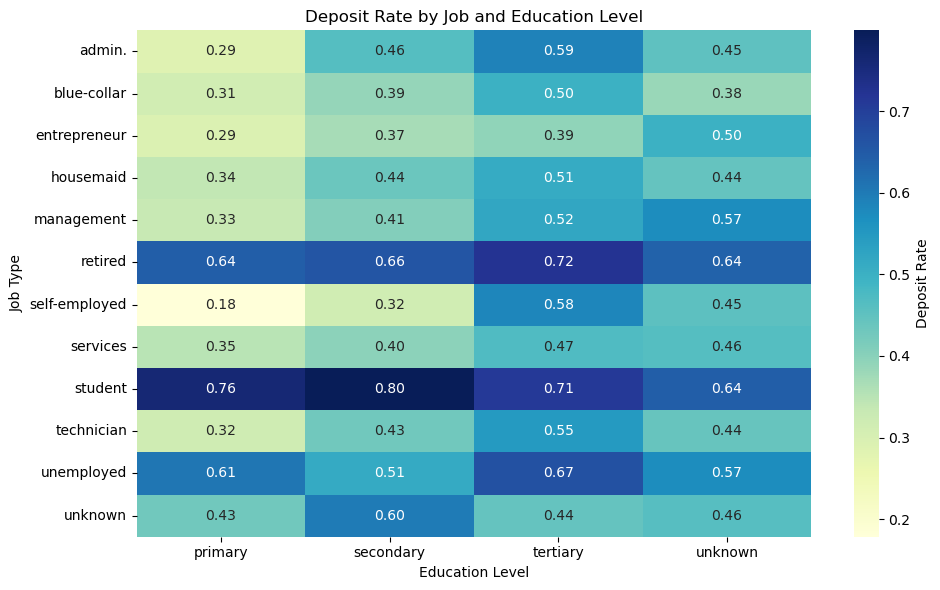

In [167]:
import seaborn as sns


# Create the pivot table: average deposit rate by job and education
job_edu_deposit_rate = df.pivot_table(
    values='deposit_binary',
    index='job',
    columns='education',
    aggfunc='mean'
)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(job_edu_deposit_rate, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Deposit Rate'})
plt.title("Deposit Rate by Job and Education Level")
plt.xlabel("Education Level")
plt.ylabel("Job Type")
plt.tight_layout()
plt.show()




I wanted to look into jobs and deposit rates slightly more by adding in if education levels matter. 
Students with teriary educationa and retired individuals across every education level have the highest deposit rates. This goes along with the bar charts from above. Blue- Collar and housemaid roles tended to have consistently low engagment regardelss of the education levels. 

The education that helped improve deposit rates the most was tertieary education. 

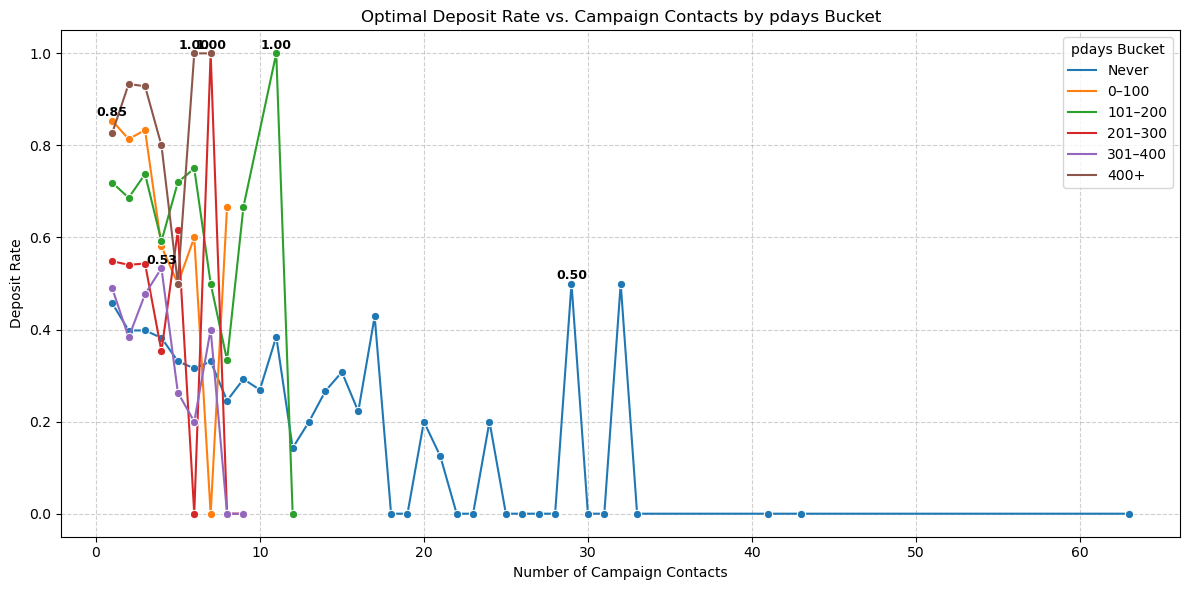

In [163]:
pdays_campaign_summary = df.groupby(['pdays', 'campaign'])['deposit_binary'].mean().reset_index()
job_edu_deposit_rate = df.pivot_table(values='deposit_binary', index='job', columns='education', aggfunc='mean')

pdays_campaign_summary

optimal_points = line_data.loc[line_data.groupby('pdays_bucket')['deposit_binary'].idxmax()]

plt.figure(figsize=(12, 6))
sns.lineplot(data=line_data, x='campaign', y='deposit_binary', hue='pdays_bucket', marker='o', palette='tab10')

for _, row in optimal_points.iterrows():
    plt.text(row['campaign'], row['deposit_binary'] + 0.01,
             f"{row['deposit_binary']:.2f}",
             horizontalalignment='center', fontsize=9, color='black', fontweight='bold')


plt.title("Optimal Deposit Rate vs. Campaign Contacts by pdays Bucket")
plt.xlabel("Number of Campaign Contacts")
plt.ylabel("Deposit Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="pdays Bucket")
plt.tight_layout()
plt.show()



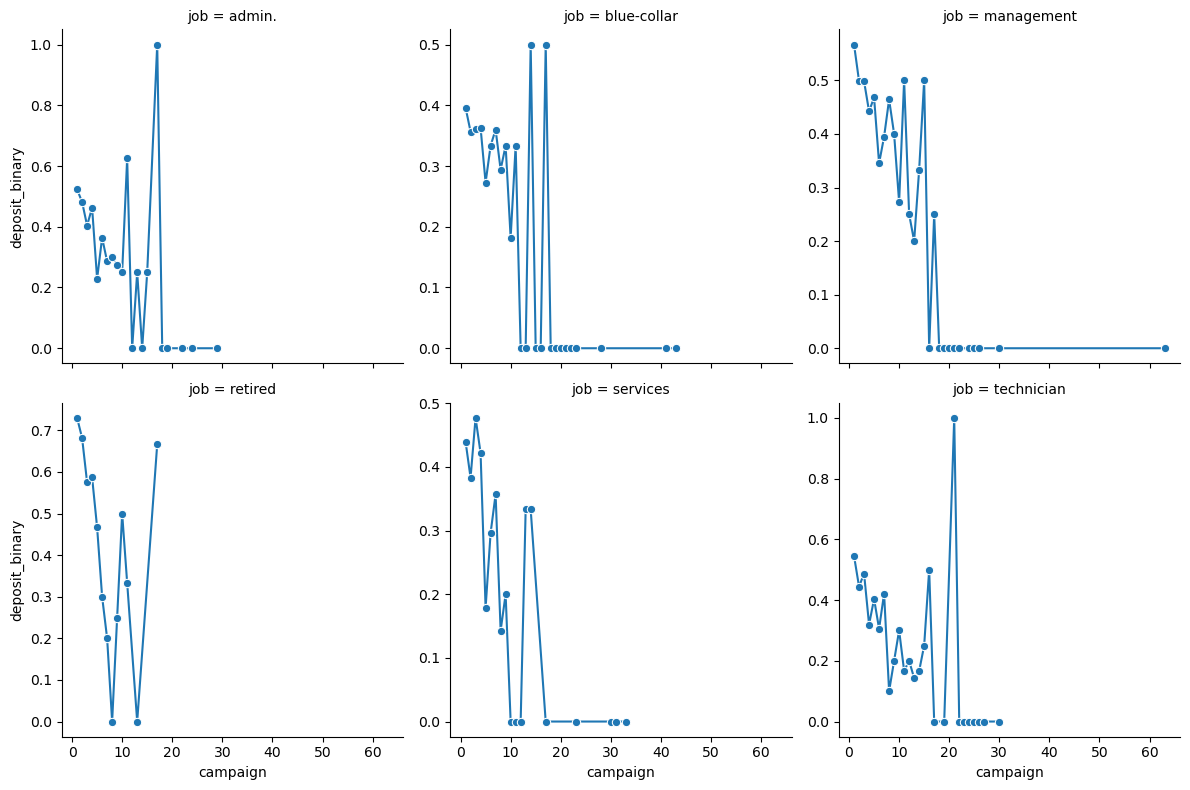

In [164]:
sns.relplot(data=filtered_job_campaign, x='campaign', y='deposit_binary', col='job',
            kind='line', col_wrap=3, marker='o', height=4, facet_kws={'sharey': False})


To tie it back to the main intitiave I wanted to look into the campaign strategy. 
After plotting pdays and campaign together in one plot against the deposit rate. I wanted to break it down into specic jobs. Students and retirees did well with minimal contact, but blue-collar workers' deposit rates dropped off by a lot after just a few touches. These variables essentially helped to analyze the impact of contact timing and frequency. 

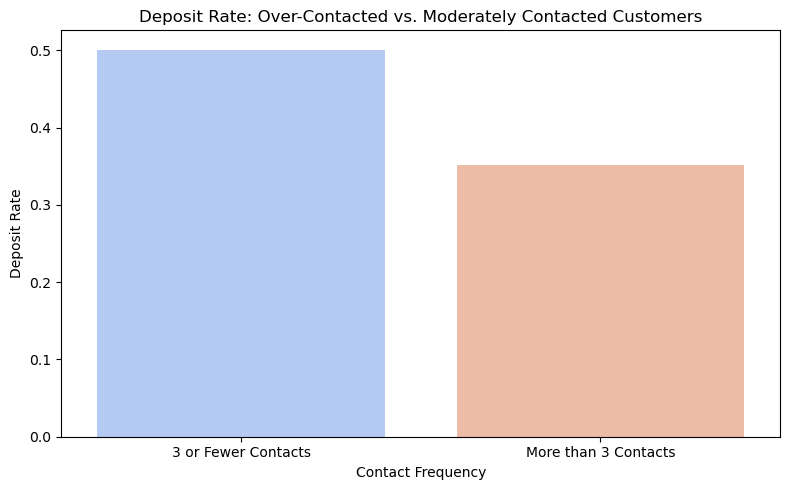

,over_contacted,deposit_binary
0,3 or Fewer Contacts,0.500711
1,More than 3 Contacts,0.351861


In [165]:
df['over_contacted'] = df['campaign'] > 3


over_contacted_stats = df.groupby('over_contacted')['deposit_binary'].mean().reset_index()
over_contacted_stats['over_contacted'] = over_contacted_stats['over_contacted'].map({True: 'More than 3 Contacts', False: '3 or Fewer Contacts'})


plt.figure(figsize=(8, 5))
sns.barplot(data=over_contacted_stats, x='over_contacted', y='deposit_binary', palette='coolwarm')
plt.title("Deposit Rate: Over-Contacted vs. Moderately Contacted Customers")
plt.xlabel("Contact Frequency")
plt.ylabel("Deposit Rate")
plt.tight_layout()
plt.show()

over_contacted_stats


To quanitfy the graphs I came up with a new variable that shows those who were over contacted. 3 or less contact reulted in a deposit rate of 50.1%. More than that resulted in 35.2% deposit rate. This shows that being 'too desperate' or following up too much hurts the performance more than anything. 

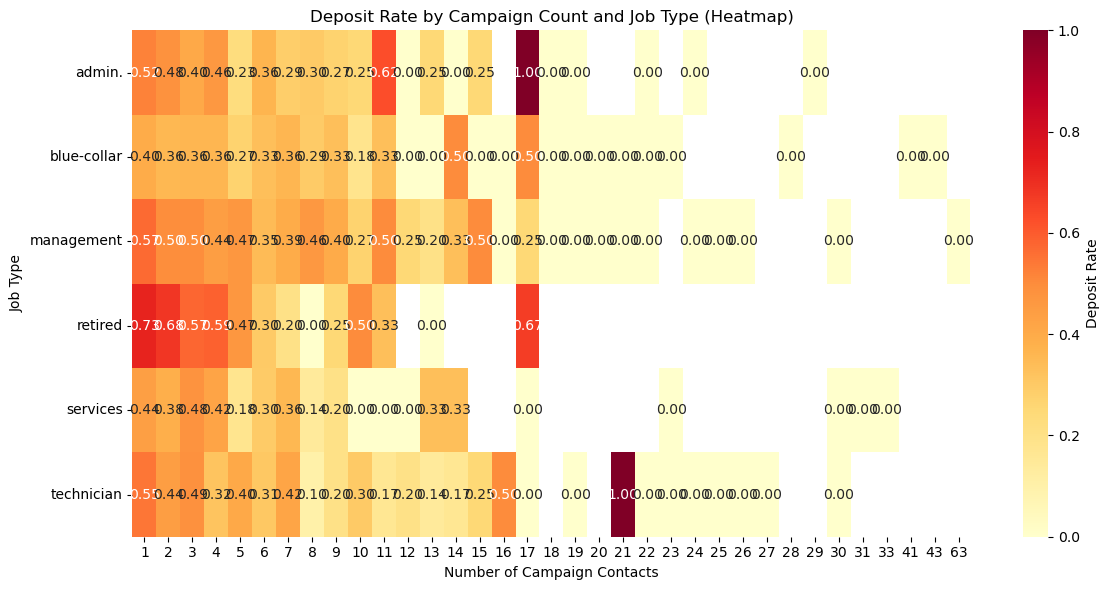

In [166]:
pivot_job_campaign = filtered_job_campaign.pivot(index='job', columns='campaign', values='deposit_binary')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_job_campaign, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Deposit Rate'})
plt.title("Deposit Rate by Campaign Count and Job Type (Heatmap)")
plt.xlabel("Number of Campaign Contacts")
plt.ylabel("Job Type")
plt.tight_layout()
plt.show()




Plotting the variables, campaign and pdays, together in a heatmap we can see that too many campaign contact often led to lower deposit rates. Espeically when customers had not been contacted before. This shown as pday = -1. 

Why is this important?
Understanfing who to target, how to target them, and how often to can dramatically improve return on investment for a bank. Over- contacting can result in the bank losing customers and money, not just deposit rates.

Conclusion: 
The data here shows that personalization and timing will help out the bank the most. Contacting the right peroson at right time matters more than persistence. Knowing their job and age can be more beneficial than their financial standings. We have seen that balance can have an impact on deposti rates, but it is not its driving force. Knowing the customers is very important when contacting them. 